# Kaggle - Titanic

- Writed at : 2020-06-14

## Introduction
Titanic dataset is most popular dataset to start data analytics.  
I start summarize kaggle in github since today.  
The goal of titanic as below:
- **Goal** : Predict survival passenger

## Data dictionary

| Column name | Definition | Key |
| --- | --- | --- |
| Survival | Survival | 0=death, 1=survived|
| pclass | Ticket class | 1 is upper class then 2 |
| sex | Sex | |
| Age | Age in year | if someone's age less then 1, then it can be form xx.5 |
|sibsp | Number of siblings / spouses aboard the Titanic | | 
| parch | Number of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton|


## Load data

In [43]:
import pandas as pd
titanic_data = pd.read_csv('data/titanic/train.csv')

## Show information of titanic
We can show missing value in columns which column names are Age, Cabin, Embarked.  
We have to fill or drop missing value.  

In [44]:
# show information of titanic
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Describe of titanic dataset

We can show mean, std and so on in age, sibsp, parch, fare.  
PassengerID is eigenvalue and Pclass, Survived is categorical value so we can't use mean and median etc.  


In [45]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory data analysis

### Survival
Passenger num of survived=0 is more then survived=1.  



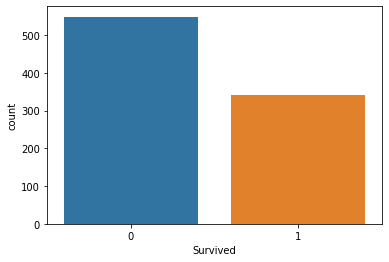

In [46]:
%matplotlib inline
# count value of survival

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot('Survived', data=titanic_data)

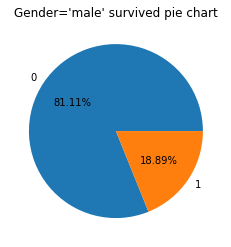

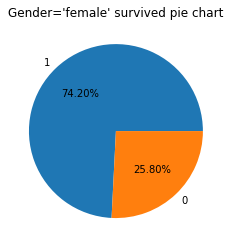

In [47]:
# survive and sex

for gender in titanic_data['Sex'].unique():
    gender_titanic = titanic_data[titanic_data['Sex'] == gender]['Survived'].value_counts()
    plt.pie(gender_titanic.values, labels=gender_titanic.index, autopct='%1.2f%%')
    plt.title(f'Gender=\'{gender}\' survived pie chart')
    plt.show()

In [48]:
cabin_pass_df = titanic_data[['Cabin', 'Pclass']]

In [49]:
cabin_pass_df['cabin_char'] = cabin_pass_df['Cabin'].apply(lambda x : x[:1] if type(x)==str else x)

/Users/h/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
cabin_pass_df

,Cabin,Pclass,cabin_char
0,NaN,3,NaN
1,C85,1,C
2,NaN,3,NaN
3,C123,1,C
4,NaN,3,NaN
...,...,...,...
886,NaN,2,NaN
887,B42,1,B
888,NaN,3,NaN
889,C148,1,C


In [51]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [54]:
male_mean = titanic_data[titanic_data['Sex']=='male'].Age.mean()
female_mean = titanic_data[titanic_data['Sex']=='female'].Age.mean()
def fillna_each_gender(row):
    if row['Sex'] == 'male':
        return int(male_mean)
    else:
        return int(female_mean)

In [66]:
import numpy as np
titanic_data['Age'] = titanic_data.apply(lambda row : fillna_each_gender(row) if str(row['Age']) == 'nan' else row['Age'], axis = 1)

In [11]:
import numpy as np
titanic_data['Age'].fillna(
    titanic_data.groupby('Sex')['Age'].transform("mean").astype(np.int), inplace=True)

In [67]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [68]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode(), inplace=True)

In [69]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
titanic_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [71]:
from sklearn.preprocessing import LabelEncoder
sex_label_encoder = LabelEncoder()
titanic_data['Sex'] = sex_label_encoder.fit_transform(titanic_data['Sex'].astype(str))

In [72]:
embarked_label_encoder = LabelEncoder()
titanic_data['Embarked'] = embarked_label_encoder.fit_transform(titanic_data['Embarked'].astype(str))

In [109]:
titanic_data['Sex'].unique()

array([1, 0])

In [74]:
y = titanic_data['Survived']

In [75]:
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [77]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()

In [78]:
parameters = {'nthread':[4], 
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [4, 5, 6, 7],
              'min_child_weight': [2, 3, 4],
              'silent': [1],
              'subsample': [0.3, 0.5, 0.7],
              'colsample_bytree': [0.3, 0.5, 0.7],
              'n_estimators':  list(range(100, 1001, 100))}

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
xgb_grid = GridSearchCV(xgb_classifier, parameters, n_jobs=-1, verbose=False)

In [82]:
xgb_grid.fit(X, y)

/Users/h/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0,...
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [4, 5, 6, 7],
                         'min_child_weight': [2, 3, 4],
                        

In [83]:
best_xgb = xgb_grid.best_estimator_

In [84]:
y_pred = best_xgb.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy_score(y_test,y_pred)

0.9237668161434978

In [87]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.07,
 'max_depth': 4,
 'min_child_weight': 4,
 'n_estimators': 600,
 'nthread': 4,
 'silent': 1,
 'subsample': 0.7}

In [88]:
final_xgb_classifier = XGBClassifier(parameters = xgb_grid.best_params_)

In [89]:
final_xgb_classifier.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              parameters={'colsample_bytree': 0.5, 'learning_rate': 0.07,
                          'max_depth': 4, 'min_child_weight': 4,
                          'n_estimators': 600, 'nthread': 4, 'silent': 1,
                          'subsample': 0.7},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [112]:
test_set = pd.read_csv('data/titanic/test.csv')

In [116]:
test_set.tail(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,27.0,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,27.0,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,30.0,1,1,2668,22.3583,NaN,C


In [115]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [114]:
test_set['Age'] = test_set.apply(lambda row : fillna_each_gender(row) if str(row['Age']) == 'nan' else row['Age'], axis = 1)

In [105]:
test_set.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [117]:
test_set['Sex'] = sex_label_encoder.transform(test_set['Sex'].astype(str))

In [118]:
test_set['Embarked'] = embarked_label_encoder.transform(test_set['Embarked'].astype(str))

In [124]:
X_for_test = test_set[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [125]:
preds = final_xgb_classifier.predict(X_for_test)

In [128]:
preds[:5]

array([0, 0, 0, 0, 0])

In [130]:
sub_df = pd.DataFrame(data = {
    'PassengerId' : test_set.PassengerId,
    'Survived' : preds
})

In [132]:
sub_df.Survived.value_counts()

0    284
1    134
Name: Survived, dtype: int64

In [133]:
sub_df.to_csv('submission/submission_titanic.csv', index=False)